## Payment Transaction: Indication of fraud attempt
**Problem Statement: Predict whether a given transaction is a part of the revenue or a fraud attempt**

In [185]:
import os
import pandas as pd
import numpy as np

from modeldb.sklearn_native.ModelDbSyncer import *
from modeldb.sklearn_native import SyncableMetrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore") # suppress all warnings 

In [186]:
# Loading the Final dataset using pandas data frame
df = pd.read_csv('Payments_Fraud_Dataset.csv', parse_dates=['transDate','cardExpDate'])
df.head(3)

,transId,transDate,transAmount,transCurrency,transDescription,transChannel,cardType,cardNetwork,cardExpDate,cardCompany,...,customer.lat,customer.lon,storePOS.POSCode,storePOS.storeName,storePOS.storeRiskScore,storePOS.storeId,storePOS.storeType,storePOS.poscode,dollar_amount,fraud_flag
0,7a231e74-d228-479a-b77d-debf2ad57e41,1.51E+12,3148.373643,pound,Vel distinctio delen,MOBILE,debit,visa,22-Aug,Mueller-Mueller,...,35.652832,-97.478096,NaN,NaN,NaN,NaN,NaN,NaN,4143.259714,1
1,2863502a-5706-45ee-a1e9-fee1930487df,1.51E+12,2568.039084,dollar,Voluptatibus non vol,POS,credit,visa,20-Jan,"Frami, Frami and Frami",...,44.988780,-71.788440,8.050000e+18,Lowe-Lowe,0.001269,9f8a10b5-0858-4ed4-8a2b-c82f52469211,Ella,8.050000e+18,2568.039084,1
2,577625d4-234c-45c4-8ffc-251ec6bdc281,1.51E+12,2834.344553,pound,Corrupti nihil itaqu,WEB,credit,americanexpress,22-Aug,Daniel and Sons,...,47.718056,-116.950554,NaN,NaN,NaN,NaN,NaN,NaN,3729.997431,0


In [189]:
df.shape

(1000, 62)

In [194]:
#converting int datatype to object
df['fraud_flag']=df['fraud_flag'].apply(str)

In [195]:
# Separating the Numerical Variables
num_df=df.select_dtypes(include=['int64', 'float64']).copy()
num_df.head()

,transAmount,zipCode,latitude,longitude,posDetails.lat,posDetails.lon,mobileDetails.userLat,mobileDetails.userLong,paymentCard.cardLimit,paymentCard.cardBalance,customer.customerAvgSpending,customer.customerRiskScore,customer.custStreet2,customer.custPostalCode,customer.lat,customer.lon,storePOS.storeRiskScore,dollar_amount
0,3148.373643,73025,35.652832,-97.478096,NaN,NaN,30.727622,-159.614790,405430.1673,87471.16409,4408.430624,0.501168,637,73025,35.652832,-97.478096,NaN,4143.259714
1,2568.039084,99403,46.394623,-117.064461,46.394623,-117.06446,NaN,NaN,751934.2058,90193.85018,3392.749690,0.529389,860,5907,44.988780,-71.788440,0.001269,2568.039084
2,2834.344553,83877,47.718056,-116.950554,NaN,NaN,NaN,NaN,151800.7076,95162.11175,6658.768659,0.050233,893,83877,47.718056,-116.950554,NaN,3729.997431
3,2711.427071,22551,38.200966,-77.589157,NaN,NaN,25.439331,65.590348,737600.6345,95529.95420,6549.566403,0.395297,861,22551,38.200966,-77.589160,NaN,3568.238026
4,143.000000,85658,32.436737,-111.225380,NaN,NaN,-88.436615,-58.664984,493635.9065,67422.43502,7862.513653,0.493555,450,85658,32.436737,-111.225380,NaN,2.197910


In [196]:
num_df.shape

(1000, 18)

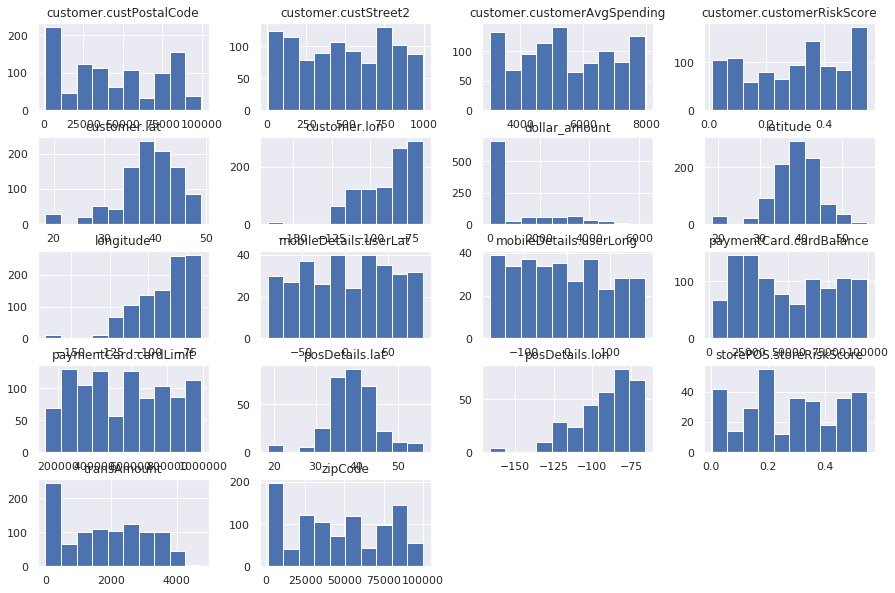

In [197]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
num_df.hist(ax=ax)
plt.show()

In [198]:
# How much data is missing for each variables?
percent_missing = num_df.isnull().sum() * 100 / len(df)
percent_missing

transAmount                      0.0
zipCode                          0.0
latitude                         0.0
longitude                        0.0
posDetails.lat                  68.4
posDetails.lon                  68.4
mobileDetails.userLat           67.8
mobileDetails.userLong          67.8
paymentCard.cardLimit            0.0
paymentCard.cardBalance          0.0
customer.customerAvgSpending     0.0
customer.customerRiskScore       0.0
customer.custStreet2             0.0
customer.custPostalCode          0.0
customer.lat                     0.0
customer.lon                     0.0
storePOS.storeRiskScore         68.4
dollar_amount                    0.0
dtype: float64

In [199]:
#Imputing the missing values by their corresponding means
num_df["storePOS.storeRiskScore"].fillna(num_df["storePOS.storeRiskScore"].mean(), inplace=True)
num_df["posDetails.lat"].fillna(num_df["posDetails.lat"].mean(), inplace=True)
num_df["posDetails.lon"].fillna(num_df["posDetails.lon"].mean(), inplace=True)
num_df["mobileDetails.userLat"].fillna(num_df["mobileDetails.userLat"].mean(), inplace=True)
num_df["mobileDetails.userLong"].fillna(num_df["mobileDetails.userLong"].mean(), inplace=True)

In [200]:
#checking whther any missing values
num_df.isnull().sum()

transAmount                     0
zipCode                         0
latitude                        0
longitude                       0
posDetails.lat                  0
posDetails.lon                  0
mobileDetails.userLat           0
mobileDetails.userLong          0
paymentCard.cardLimit           0
paymentCard.cardBalance         0
customer.customerAvgSpending    0
customer.customerRiskScore      0
customer.custStreet2            0
customer.custPostalCode         0
customer.lat                    0
customer.lon                    0
storePOS.storeRiskScore         0
dollar_amount                   0
dtype: int64

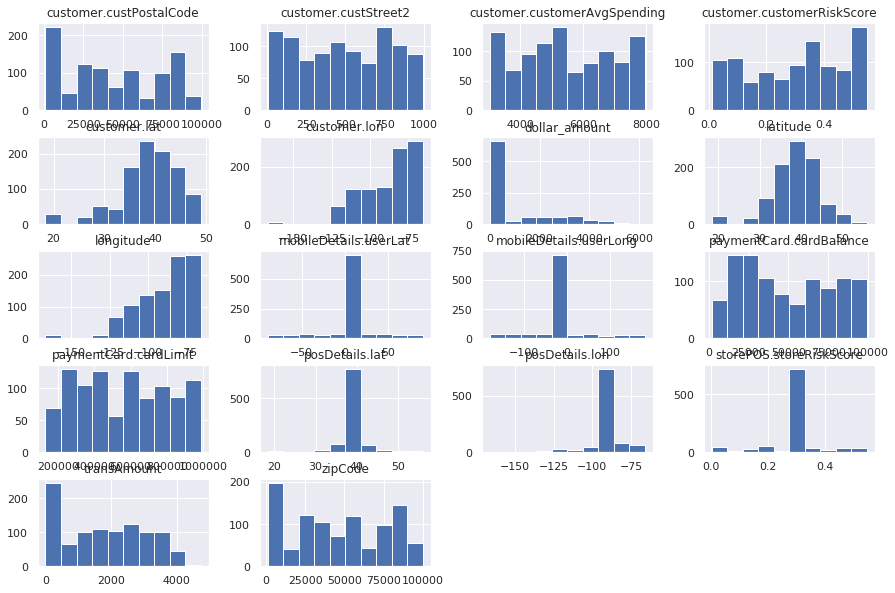

In [201]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
num_df.hist(ax=ax)
plt.show()

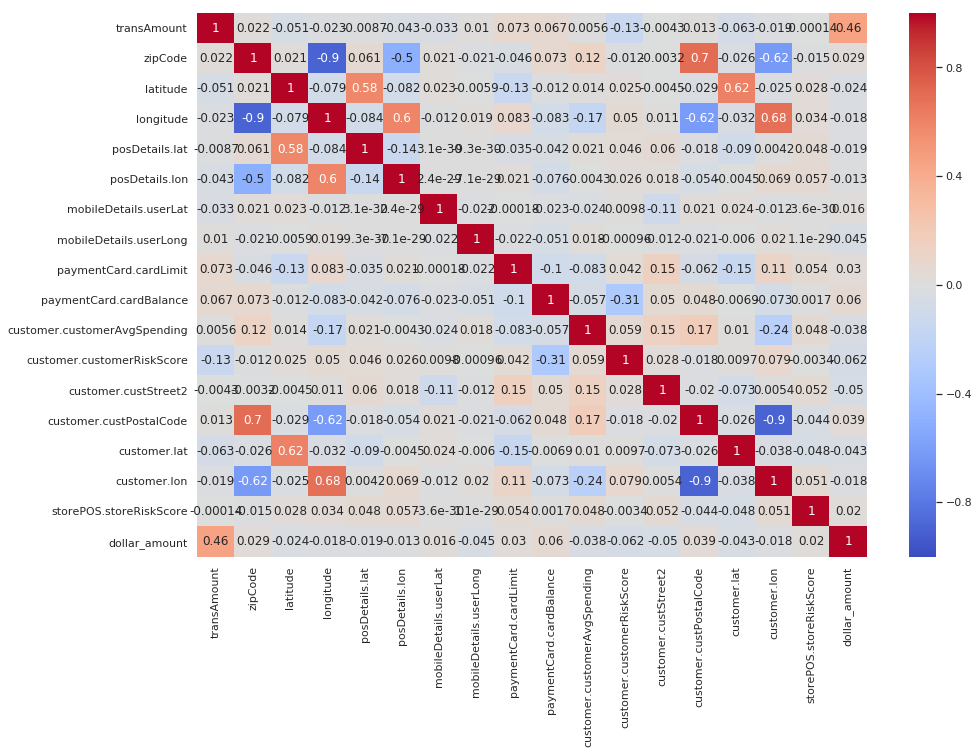

In [202]:
# generating correlation heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(), vmin=-1,cmap='coolwarm', annot=True);

In [203]:
# Scaling the numerical variables  
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(num_df),columns = num_df.columns)

In [204]:
df_scaled.head(5)

,transAmount,zipCode,latitude,longitude,posDetails.lat,posDetails.lon,mobileDetails.userLat,mobileDetails.userLong,paymentCard.cardLimit,paymentCard.cardBalance,customer.customerAvgSpending,customer.customerRiskScore,customer.custStreet2,customer.custPostalCode,customer.lat,customer.lon,storePOS.storeRiskScore,dollar_amount
0,1.070398,0.861626,-0.513390,-0.404736,-1.973952e-15,0.000000,9.674400e-01,-2.543074e+00,-0.622738,1.339122,-0.709786,1.176455,0.490639,0.931046,-0.511860,-0.477102,0.000000,2.163081
1,0.608056,1.740994,1.227787,-1.537747,2.011724e+00,-2.300777,-1.509110e-17,-3.021792e-17,0.797130,1.434425,-1.406581,1.345436,1.238952,-1.304048,1.026238,1.039963,-2.970155,1.078515
2,0.820217,1.223401,1.442307,-1.531158,-1.973952e-15,0.000000,-1.509110e-17,-3.021792e-17,-1.662034,1.608330,0.834029,-1.523581,1.349689,1.292429,1.475886,-1.627018,0.000000,1.878543
3,0.722291,-0.821033,-0.100354,0.745777,-1.973952e-15,0.000000,7.877326e-01,1.287930e+00,0.738396,1.621206,0.759112,0.542541,1.242308,-0.749787,-0.092055,0.697410,0.000000,1.767169
4,-1.323926,1.282775,-1.034699,-1.199974,-1.973952e-15,0.000000,-3.082016e+00,-8.257992e-01,-0.261297,0.637350,1.659843,1.130874,-0.136871,1.351738,-1.041712,-1.288927,0.000000,-0.688110


In [205]:
# Separating the Categorical Variables
cat_df = df.select_dtypes(exclude=['int64','float64']).copy()
cat_df.nunique()
cat_df.head()

,transDate,transCurrency,transDescription,transChannel,cardType,cardNetwork,cardExpDate,cardCompany,city,deviceType,...,customer.custGender,customer.custMaritalStatus,customer.custIncomeLevel,customer.custStreet1,customer.custCity,customer.custState,customer.custCountry,storePOS.storeName,storePOS.storeType,fraud_flag
0,1.51E+12,pound,Vel distinctio delen,MOBILE,debit,visa,22-Aug,Mueller-Mueller,Edmond,symbian,...,Male,Married,Very High,Darrick Dale,Edmond,OK,US,NaN,NaN,1
1,1.51E+12,dollar,Voluptatibus non vol,POS,credit,visa,20-Jan,"Frami, Frami and Frami",Clarkston,POS,...,Male,Other,High,Zieme Walks,Norton,VT,US,Lowe-Lowe,Ella,1
2,1.51E+12,pound,Corrupti nihil itaqu,WEB,credit,americanexpress,22-Aug,Daniel and Sons,PostFalls,ub,...,Male,Married,Low,Juana Street,PostFalls,ID,US,NaN,NaN,0
3,1.51E+12,pound,Enim porro quaerat.,MOBILE,debit,mastercard,20-Mar,Fritsch-Fritsch,Spotsylvania,android,...,Female,Married,Low,Legros Throughway,Spotsylvania,VA,US,NaN,NaN,0
4,1.51E+12,rupee,Atque et inventore a,MOBILE,prepaid,mastercard,20-Jan,Langworth-Langworth,Marana,android,...,Female,Unmarried,Low,Maegan Mews,Marana,AZ,US,NaN,NaN,0


In [206]:
cat_df.shape

(1000, 44)

In [208]:
#Imputing the missing values by their corresponding mode

cat_df["posDetails.geoStreet1"].fillna(cat_df["posDetails.geoStreet1"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoCity"].fillna(cat_df["posDetails.geoCity"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoState"].fillna(cat_df["posDetails.geoState"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoCountry"].fillna(cat_df["posDetails.geoCountry"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoPostalCodeType"].fillna(cat_df["posDetails.geoPostalCodeType"].mode().iloc[0],inplace=True)

cat_df["mobileDetails.deviceOS"].fillna(cat_df["mobileDetails.deviceOS"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.deviceNetwork"].fillna(cat_df["mobileDetails.deviceNetwork"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.appName"].fillna(cat_df["mobileDetails.appName"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.deviceName"].fillna(cat_df["mobileDetails.deviceName"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.deviceIP"].fillna(cat_df["mobileDetails.deviceIP"].mode().iloc[0],inplace=True)


cat_df["webDetails.deviceMacAddr"].fillna(cat_df["webDetails.deviceMacAddr"].mode().iloc[0],inplace=True)
cat_df["webDetails.hostURL"].fillna(cat_df["webDetails.hostURL"].mode().iloc[0],inplace=True)
cat_df["webDetails.browser"].fillna(cat_df["webDetails.browser"].mode().iloc[0],inplace=True)
cat_df["webDetails.deviceOS"].fillna(cat_df["webDetails.deviceOS"].mode().iloc[0],inplace=True)
cat_df["webDetails.deviceIP"].fillna(cat_df["webDetails.deviceIP"].mode().iloc[0],inplace=True)
 
cat_df["storePOS.storeName"].fillna(cat_df["storePOS.storeName"].mode().iloc[0],inplace=True)
cat_df["storePOS.storeType"].fillna(cat_df["storePOS.storeType"].mode().iloc[0],inplace=True)

[Text(0, 0.5, 'samples'),
 Text(0.5, 1.0, 'Fraud_Flag class distribution Before SMOTE')]

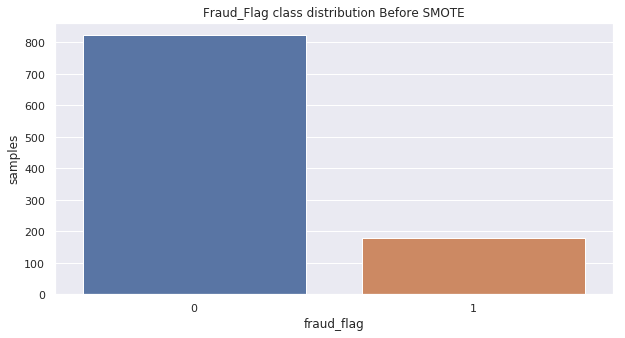

In [210]:
# fraud_flag distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(data=cat_df, x=cat_df.fraud_flag)
ax.set(ylabel='samples',title="Fraud_Flag class distribution Before SMOTE")

In [211]:
# Defining the response variable dataframe
y=cat_df[['fraud_flag']]

In [214]:
del cat_df['fraud_flag']

In [215]:
#Creating the dummy variables for the categorical data
dummy_df=pd.get_dummies(cat_df, drop_first=True)

In [216]:
dummy_df.shape

(1000, 3358)

In [217]:
# Independent Dataset
X=pd.concat([df_scaled, dummy_df], axis=1)

In [218]:
X.head()

,transAmount,zipCode,latitude,longitude,posDetails.lat,posDetails.lon,mobileDetails.userLat,mobileDetails.userLong,paymentCard.cardLimit,paymentCard.cardBalance,...,storePOS.storeType_Saige,storePOS.storeType_Shayna,storePOS.storeType_Soledad,storePOS.storeType_Terrance,storePOS.storeType_Tod,storePOS.storeType_Verner,storePOS.storeType_Wanda,storePOS.storeType_Whitney,storePOS.storeType_Wilma,storePOS.storeType_Zella
0,1.070398,0.861626,-0.513390,-0.404736,-1.973952e-15,0.000000,9.674400e-01,-2.543074e+00,-0.622738,1.339122,...,0,0,0,0,0,0,0,0,0,0
1,0.608056,1.740994,1.227787,-1.537747,2.011724e+00,-2.300777,-1.509110e-17,-3.021792e-17,0.797130,1.434425,...,0,0,0,0,0,0,0,0,0,0
2,0.820217,1.223401,1.442307,-1.531158,-1.973952e-15,0.000000,-1.509110e-17,-3.021792e-17,-1.662034,1.608330,...,0,0,0,0,0,0,0,0,0,0
3,0.722291,-0.821033,-0.100354,0.745777,-1.973952e-15,0.000000,7.877326e-01,1.287930e+00,0.738396,1.621206,...,0,0,0,0,0,0,0,0,0,0
4,-1.323926,1.282775,-1.034699,-1.199974,-1.973952e-15,0.000000,-3.082016e+00,-8.257992e-01,-0.261297,0.637350,...,0,0,0,0,0,0,0,0,0,0


In [219]:
f_df=pd.concat([X, y], axis=1)

In [220]:
f_df.head(5)

,transAmount,zipCode,latitude,longitude,posDetails.lat,posDetails.lon,mobileDetails.userLat,mobileDetails.userLong,paymentCard.cardLimit,paymentCard.cardBalance,...,storePOS.storeType_Shayna,storePOS.storeType_Soledad,storePOS.storeType_Terrance,storePOS.storeType_Tod,storePOS.storeType_Verner,storePOS.storeType_Wanda,storePOS.storeType_Whitney,storePOS.storeType_Wilma,storePOS.storeType_Zella,fraud_flag
0,1.070398,0.861626,-0.513390,-0.404736,-1.973952e-15,0.000000,9.674400e-01,-2.543074e+00,-0.622738,1.339122,...,0,0,0,0,0,0,0,0,0,1
1,0.608056,1.740994,1.227787,-1.537747,2.011724e+00,-2.300777,-1.509110e-17,-3.021792e-17,0.797130,1.434425,...,0,0,0,0,0,0,0,0,0,1
2,0.820217,1.223401,1.442307,-1.531158,-1.973952e-15,0.000000,-1.509110e-17,-3.021792e-17,-1.662034,1.608330,...,0,0,0,0,0,0,0,0,0,0
3,0.722291,-0.821033,-0.100354,0.745777,-1.973952e-15,0.000000,7.877326e-01,1.287930e+00,0.738396,1.621206,...,0,0,0,0,0,0,0,0,0,0
4,-1.323926,1.282775,-1.034699,-1.199974,-1.973952e-15,0.000000,-3.082016e+00,-8.257992e-01,-0.261297,0.637350,...,0,0,0,0,0,0,0,0,0,0


In [221]:
# exporting the final dataframe
# saving the dataframe 
f_df.to_csv("Final_df.csv") 

In [222]:
# USING RANDOM FOREST FOR FEATURE SELECTION
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [223]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)

# Fitting the classifier
rfc.fit(X, y)

# Printing the name of each feature along with the gini value
for feature in zip(X.columns, rfc.feature_importances_):
    #print(feature)
    pass

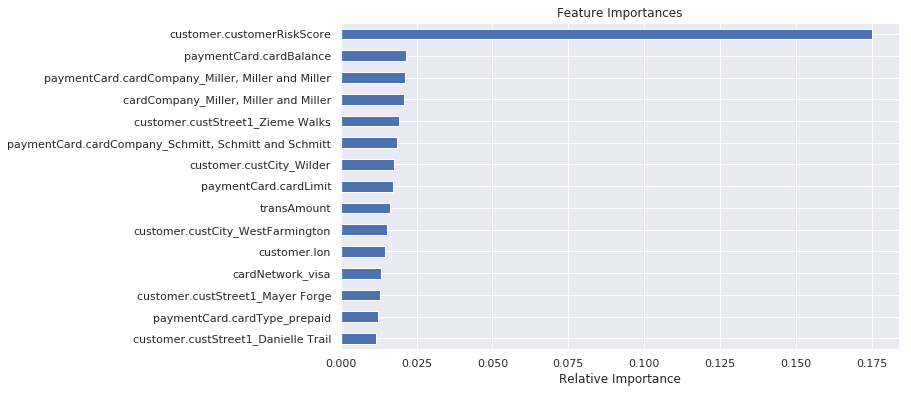

In [224]:
# Plotting top 10 feature importance
plt.figure(figsize=(10,6))
plt.title('Feature Importances')   
plt.xlabel('Relative Importance')   

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.sort_values()
feat_importances.nlargest(15).sort_values().plot(kind='barh')
plt.show()

In [225]:
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.01)
sfm.fit(X, y)

# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

transAmount
paymentCard.cardLimit
paymentCard.cardBalance
customer.customerRiskScore
customer.lon
cardNetwork_visa
cardExpDate_22-Apr
cardCompany_Champlin, Champlin and Champlin
cardCompany_Kertzmann, Kertzmann and Kertzmann
cardCompany_Miller, Miller and Miller
cardCompany_Schmitt, Schmitt and Schmitt
paymentCard.cardType_prepaid
paymentCard.cardCompany_Miller, Miller and Miller
paymentCard.cardCompany_Rippin, Rippin and Rippin
paymentCard.cardCompany_Schmitt, Schmitt and Schmitt
customer.custStreet1_Danielle Trail
customer.custStreet1_Mayer Forge
customer.custStreet1_Zieme Walks
customer.custCity_WestFarmington
customer.custCity_Wilder


In [226]:
y=f_df[['fraud_flag']]

In [227]:
X_imp=X[['transAmount','latitude','paymentCard.cardLimit','paymentCard.cardBalance','customer.customerAvgSpending',
         'customer.customerRiskScore','customer.custStreet2','cardExpDate_20-Jul','cardCompany_Kertzmann, Kertzmann and Kertzmann',
        'paymentCard.cardExpDate_22-Jan','paymentCard.cardCompany_Barton Group','paymentCard.cardCompany_Grant and Sons',
        'paymentCard.cardCompany_Kertzmann, Kertzmann and Kertzmann','paymentCard.cardCompany_Miller, Miller and Miller',
         'paymentCard.cardCompany_Rippin, Rippin and Rippin','customer.custStreet1_Jackie Centers',
         'customer.custStreet1_Zieme Walks','customer.custState_ME']]
X_imp.head()

,transAmount,latitude,paymentCard.cardLimit,paymentCard.cardBalance,customer.customerAvgSpending,customer.customerRiskScore,customer.custStreet2,cardExpDate_20-Jul,"cardCompany_Kertzmann, Kertzmann and Kertzmann",paymentCard.cardExpDate_22-Jan,paymentCard.cardCompany_Barton Group,paymentCard.cardCompany_Grant and Sons,"paymentCard.cardCompany_Kertzmann, Kertzmann and Kertzmann","paymentCard.cardCompany_Miller, Miller and Miller","paymentCard.cardCompany_Rippin, Rippin and Rippin",customer.custStreet1_Jackie Centers,customer.custStreet1_Zieme Walks,customer.custState_ME
0,1.070398,-0.513390,-0.622738,1.339122,-0.709786,1.176455,0.490639,0,0,0,0,0,0,0,0,0,0,0
1,0.608056,1.227787,0.797130,1.434425,-1.406581,1.345436,1.238952,0,0,0,0,0,0,0,0,0,1,0
2,0.820217,1.442307,-1.662034,1.608330,0.834029,-1.523581,1.349689,0,0,0,0,0,0,0,0,0,0,0
3,0.722291,-0.100354,0.738396,1.621206,0.759112,0.542541,1.242308,0,0,0,0,0,0,0,0,0,0,0
4,-1.323926,-1.034699,-0.261297,0.637350,1.659843,1.130874,-0.136871,0,0,0,0,0,0,0,0,0,0,0


In [228]:
# Building the Model and importing the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
warnings.filterwarnings("ignore") # suppress all warnings 

In [229]:
# Creating a new project
name = "Payments Fraud Detection"
author = "Manmohan Sharma"
description = "Classification Technique"
syncer_obj = Syncer(
    NewOrExistingProject(name, author, description),
    NewOrExistingExperiment("Payments Fraud Detection", "Payments Fraud Detection"),
    NewExperimentRun("Payments Fraud Detection"))

In [230]:
all_inputs = X_imp.values
all_classes = f_df['fraud_flag']

In [231]:
syncer_obj.add_tag(all_inputs, "data to input into model")

In [232]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV

In [233]:
# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = cross_validation.train_test_split_sync(
    all_inputs, all_classes, train_size=0.80, random_state=1)

In [234]:
classifier_RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [235]:
syncer_obj.add_tag(classifier_RF, "random forest")

In [236]:
classifier_RF.fit_sync(training_inputs, training_classes)

In [237]:
# Validate the classifier on the testing set using classification accuracy
# decision_tree_classifier.score(testing_inputs, testing_classes)

# NOTE: score is equivalent to sklearn.metrics.accuracy_score.
SyncableMetrics.compute_metrics(
    classifier_RF, accuracy_score, testing_classes,
    classifier_RF.predict(testing_inputs), training_inputs, "", "")

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_validation.cross_val_score_sync(
    classifier_RF, all_inputs, all_classes, cv=2)

In [238]:
all_inputs.shape

(1000, 18)

In [239]:
all_classes.shape

(1000,)

In [178]:
syncer_obj.sync()

In [179]:
classifier_LR= LogisticRegression()

In [180]:
syncer_obj.add_tag(classifier_LR, "Logistic Regression")
classifier_LR.fit_sync(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
# decision_tree_classifier.score(testing_inputs, testing_classes)

# NOTE: score is equivalent to sklearn.metrics.accuracy_score.
SyncableMetrics.compute_metrics(
    classifier_LR, accuracy_score, testing_classes,
    classifier_LR.predict(testing_inputs), training_inputs, "", "")

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_validation.cross_val_score_sync(
    classifier_LR, all_inputs, all_classes, cv=2)
syncer_obj.sync()

In [181]:
classifier_DT = DecisionTreeClassifier()
syncer_obj.add_tag(classifier_DT, "Decision Tree Classifier")
classifier_DT.fit_sync(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
# decision_tree_classifier.score(testing_inputs, testing_classes)

# NOTE: score is equivalent to sklearn.metrics.accuracy_score.
SyncableMetrics.compute_metrics(
    classifier_DT, accuracy_score, testing_classes,
    classifier_DT.predict(testing_inputs), training_inputs, "", "")

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_validation.cross_val_score_sync(
    classifier_DT, all_inputs, all_classes, cv=2)
syncer_obj.sync()

In [183]:
from sklearn.externals import joblib

#Save model as .pkl file
joblib.dump(classifier_RF,"/home/ubuntu/data-science-workbench/model-deployer/deploy/rf_model.pkl.z")

['/home/ubuntu/data-science-workbench/model-deployer/deploy/rf_model.pkl.z']